# Random Forest Explained

In [1]:
import joblib
loaded_joblib = joblib.load('RanFor_Project1Revisited.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor'])

In [2]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_rf_model = loaded_joblib['RandomForestRegressor']

In [3]:
import shap
shap.initjs()

In [4]:
len(X_train_df)

6392

In [5]:
X_shap = shap.sample(X_train_df, nsamples=400, random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,2.0,0.110653,36.9506,2007.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2497,15.10,2.0,0.087407,221.8456,1997.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,1.0,0.015592,184.8266,2002.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8117,10.80,1.0,0.049820,243.2144,2002.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7475,15.00,1.0,0.044999,140.4838,2002.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [7]:
explainer = shap.Explainer(loaded_rf_model)
explainer

In [8]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
X_shap.shape

(400, 32)

In [10]:
shap_values.shape

(400, 32)

In [11]:
shap_values[0]

.values =
array([ 8.80118039e+00,  8.52296139e+00, -1.21006642e+00, -1.64691677e+03,
       -2.20028697e+01, -9.69196539e-01,  7.03117456e-02, -9.14242302e-01,
       -6.34128806e-01,  7.12222790e-01,  8.17998815e+00, -1.65502842e+00,
       -1.69333410e+00, -6.02252652e+00,  8.67883374e-02, -3.83175139e-01,
       -5.17054830e-01, -1.11776152e+00, -8.54693633e-01, -1.09575545e+00,
       -5.53598696e-01, -6.41371863e-01, -3.65210164e+00,  1.35674438e+00,
        7.91213421e-01, -5.11567657e-01,  4.33903575e+00,  3.97280030e+00,
        1.66270996e+02,  6.95887028e+00,  6.06506215e+00, -6.58917949e+01])

.base_values =
array([2209.74517621])

.data =
array([1.58500000e+01, 2.00000000e+00, 1.10653377e-01, 3.69506000e+01,
       2.00700000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.

# Shap Summary Plots

## Shap Bar Plot

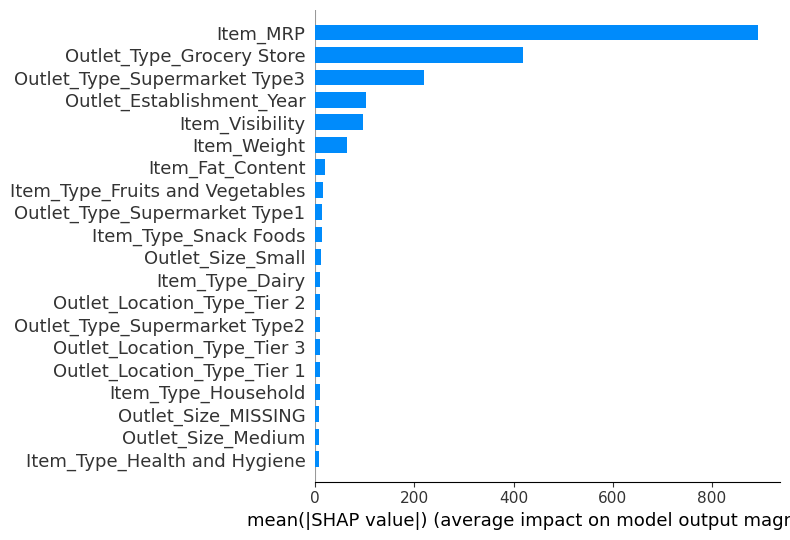

In [12]:
shap_sum_rf = shap.summary_plot(shap_values,features= X_shap, plot_type='bar', title= 'Shap Summary Plot Random Forest', 
                  plot_size = .2)
shap_sum_rf

In [14]:
import matplotlib.pyplot as plt
plt.savefig('Data/Shap_Summary_RanFor',dpi=300)

<Figure size 640x480 with 0 Axes>

**Let's compare the Shap Summary plot above with the top 5 most important features of the Random Forest Model**
- The top 5 features for the Shap Summary are as follows:
    1. Item_MRP
    2. Outlet_Type_Grocery Store
    3. Outlet_Type_SuperMarket Type 3
    4. Outlet_Establishment_Year
    5. Item_Visibility
    
- The top 5 Features for the Feature Importance are as follows:
    1. Item_MRP
    2. Outlet_Type Grocery Store
    3. Item Visibility
    4. Outlet_Type_SuperMarket Type 3
    5. Item_Weight

Item Visiblity is higher on the feature importances and Item weight has been included. Establishment Year is included in the Shap summary, but not the Feature Importance. 



## Shap Bar Plot

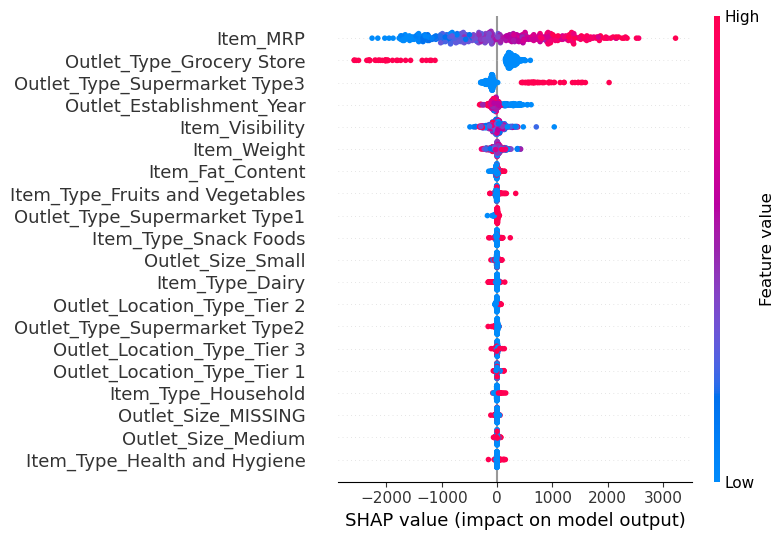

In [18]:
shap_sum_rf_dot = shap.summary_plot(shap_values,X_shap, plot_size = .2)
shap_sum_rf_dot

In [19]:
plt.savefig('Data/Shap_DOTSummary_RanFor',dpi=300)

<Figure size 640x480 with 0 Axes>

**What are the most important features according to the Dot Summary Plot?**
1. Item MRP - The more Item_MRP the higher predicted sales.
2. Outlet_Type_Grocery Store - The lower the values in Grocery Store, the higher the predicted price.
3. Outlet_Type_SuperMarket Type 3 - The higher the values in Outlet_Type_SuperMarket Type 3 the higer the sales. 